<div align="center">

###### Lab 2

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 2: Predicting Heart Disease with Deep Learning

</div>

### Introduction

In the realm of healthcare, early detection and accurate prediction of diseases play a crucial role in patient care and management. Heart disease remains one of the leading causes of mortality worldwide, making the development of effective diagnostic tools essential. This lab leverages deep learning to predict the presence of heart disease in patients using a subset of 14 key attributes from the Cleveland Heart Disease Database. The objective is to explore and apply deep learning techniques to distinguish between the presence and absence of heart disease based on clinical parameters.

Throughout this lab, you'll engage with the following key activities:
- Use [Pandas](https://pandas.pydata.org) to process the CSV files.
- Use [PyTorch](https://pytorch.org) to build an Artificial Neural Network (ANN) to fit the dataset.
- Evaluate the performance of the trained model to understand its accuracy.

### Attribute Information

1. age: Age of the patient in years
2. sex: (Male/Female)
3. cp: Chest pain type (4 types: low, medium, high, and severe)
4. trestbps: Resting blood pressure
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl
7. restecg: Resting electrocardiographic results (values 0,1,2)
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina
10. oldpeak: Oldpeak = ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. target: target have disease or not (1=yes, 0=no)

### References
- [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) for the dataset we use in this lab.


## A. Checking and Preprocessing

In [24]:
import pandas as pd

df = pd.read_csv('heart_dataset_train_all.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,Male,medium,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,Female,low,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,Female,medium,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,Female,high,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,Female,severe,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,Female,low,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,Female,low,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,Female,high,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,Female,low,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [25]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       273 non-null    int64  
 1   sex       272 non-null    object 
 2   cp        272 non-null    object 
 3   trestbps  272 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       273 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     273 non-null    int64  
 9   oldpeak   273 non-null    float64
 10  slope     271 non-null    float64
 11  ca        273 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.0+ KB


In [27]:
# checking for null values
df.isnull().sum()

,0
age,0
sex,1
cp,1
trestbps,1
chol,2
fbs,0
restecg,1
thalach,1
exang,0
oldpeak,0


In [28]:
df = df.dropna()

In [29]:
df.shape

(270, 14)

In [30]:
# Mapping 'sex' descriptions to numbers
sex_description = {
    'Male': 0,
    'Female': 1,
}
df.loc[:, 'sex'] = df['sex'].map(sex_description)

# Mapping 'cp' (chest pain) descriptions to numbers
pain_description = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'severe': 3
}
df.loc[:, 'cp'] = df['cp'].map(pain_description)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,1,0,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,1,1,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,1,2,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,1,3,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,1,0,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,1,0,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,1,2,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,1,0,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [31]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.385185,131.525926,245.607407,0.151852,0.522222,149.807407,0.333333,1.024074,1.400000,0.744444,2.300000,0.544444
std,9.149713,17.904675,51.529411,0.359544,0.529314,23.217253,0.472280,1.188379,0.618188,1.037166,0.623874,0.498946
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.000000,0.000000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.062222,-0.103697,0.261782,0.210520,0.109847,-0.124588,-0.412624,0.111263,0.200243,-0.165360,0.254462,0.077368,-0.244798
sex,-0.062222,1.000000,-0.040197,-0.055463,-0.166885,0.042384,-0.069599,-0.058626,0.124054,0.089726,-0.038771,0.140795,0.198493,-0.283776
cp,-0.103697,-0.040197,1.000000,0.035563,-0.063592,0.065869,0.008389,0.300307,-0.428233,-0.183616,0.135174,-0.180598,-0.139765,0.425574
trestbps,0.261782,-0.055463,0.035563,1.000000,0.128444,0.170606,-0.145195,-0.056631,0.067116,0.184896,-0.126553,0.093545,0.068690,-0.173239
chol,0.210520,-0.166885,-0.063592,0.128444,1.000000,0.003430,-0.162687,-0.023753,0.063902,0.084355,-0.031929,0.068647,0.121280,-0.096773
fbs,0.109847,0.042384,0.065869,0.170606,0.003430,1.000000,-0.086165,-0.014297,0.029190,0.007943,-0.056866,0.164266,-0.004972,-0.068845
restecg,-0.124588,-0.069599,0.008389,-0.145195,-0.162687,-0.086165,1.000000,0.025457,-0.089225,-0.047837,0.074982,-0.053946,-0.003377,0.101817
thalach,-0.412624,-0.058626,0.300307,-0.056631,-0.023753,-0.014297,0.025457,1.000000,-0.404349,-0.340564,0.370073,-0.205060,-0.078637,0.432687
exang,0.111263,0.124054,-0.428233,0.067116,0.063902,0.029190,-0.089225,-0.404349,1.000000,0.294308,-0.280124,0.106250,0.189253,-0.457502
oldpeak,0.200243,0.089726,-0.183616,0.184896,0.084355,0.007943,-0.047837,-0.340564,0.294308,1.000000,-0.585472,0.223375,0.200315,-0.443504


#### Converting the DataFrame to a NumPy Array

In [33]:
import numpy as np

np_data = df.values
np_data.shape

(270, 14)

In [34]:
split_point = int(np_data.shape[0]*0.7)

np.random.shuffle(np_data)

x_train = np_data[:split_point, :13]
y_train = np_data[:split_point, 13]
x_val = np_data[split_point:, :13]
y_val = np_data[split_point:, 13]

In [35]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
x_train = np.array(x_train, dtype=float)
x_train = torch.from_numpy(x_train).float()
y_train = np.array(y_train, dtype=int)
y_train = torch.from_numpy(y_train).long()

x_val = np.array(x_val, dtype=float)
x_val = torch.from_numpy(x_val).float()
y_val = np.array(y_val, dtype=int)
y_val = torch.from_numpy(y_val).long()

batch_size = 32

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')

Number of samples in train and validation are 189 and 81.


## B. Defining Neural Networks

In PyTorch, we can use **class** to define our custom neural network architectures by subclassing the `nn.Module` class. This gives our neural network all the functionality it needs to work with PyTorch's other utilities and keeps our implementation organized.

- Neural networks are defined by subclassing `nn.Module`.
- The layers of the neural network are initialized in the `__init__` method.
- The forward pass operations on input data are defined in the `forward` method.

It's worth noting that while we only define the forward pass, PyTorch will automatically derive the backward pass for us, which is used during training to update the model's weights."

In [36]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, hidden_units=256):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(13, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

## C. Training the Neural Network & Evaluate

In [37]:
# Check your GPU status.
!nvidia-smi

Tue Mar 25 13:38:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P0             30W /   70W |     160MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [38]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

hidden_unit_options = [64, 128, 256]
learning_rate_options = [0.01, 0.001, 0.0001]
results = []

In [39]:
test_data = pd.read_csv('heart_dataset_test.csv')
test_data = test_data.values
#test_data.shape
#test_data.isnull().sum()

In [40]:
# Convert to PyTorch tensors
x_test = torch.from_numpy(test_data[:, :13]).float()
y_test = torch.from_numpy(test_data[:, 13]).long()

# Create datasets
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [41]:
# Set the model to evaluation mode
def evaluate_on_test(model, test_loader, criterion):
  model.eval()

  test_correct = 0
  test_total = 0
  total_loss = 0.0

  with torch.no_grad():
    for features, labels in test_loader:
        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        predicted = outputs.argmax(-1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

  avg_loss = total_loss / len(test_loader)
  accuracy = 100. * test_correct / test_total
  return avg_loss, accuracy

#print(f'Test accuracy is {100. * test_correct / test_total}%')

Training with hidden_units=64, learning_rate=0.01


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 5.2337, Train acc: 48.1481%, Val loss: 0.6597, Val acc: 59.2593%, Best Val loss: 0.6597 Best Val acc: 59.26%
Epoch 2/100, Train loss: 1.0941, Train acc: 57.1429%, Val loss: 0.6822, Val acc: 61.7284%, Best Val loss: 0.6597 Best Val acc: 61.73%
Epoch 3/100, Train loss: 0.6726, Train acc: 62.9630%, Val loss: 0.6622, Val acc: 61.7284%, Best Val loss: 0.6597 Best Val acc: 61.73%
Epoch 4/100, Train loss: 0.5993, Train acc: 67.1958%, Val loss: 0.6124, Val acc: 62.9630%, Best Val loss: 0.6124 Best Val acc: 62.96%
Epoch 5/100, Train loss: 0.5553, Train acc: 73.5450%, Val loss: 0.6346, Val acc: 62.9630%, Best Val loss: 0.6124 Best Val acc: 62.96%
Epoch 6/100, Train loss: 0.5888, Train acc: 67.7249%, Val loss: 0.6388, Val acc: 61.7284%, Best Val loss: 0.6124 Best Val acc: 62.96%
Epoch 7/100, Train loss: 0.5357, Train acc: 74.0741%, Val loss: 0.6115, Val acc: 65.4321%, Best Val loss: 0.6115 Best Val acc: 65.43%
Epoch 8/100, Train loss: 0.5146, Train acc: 75.1323%, Val loss

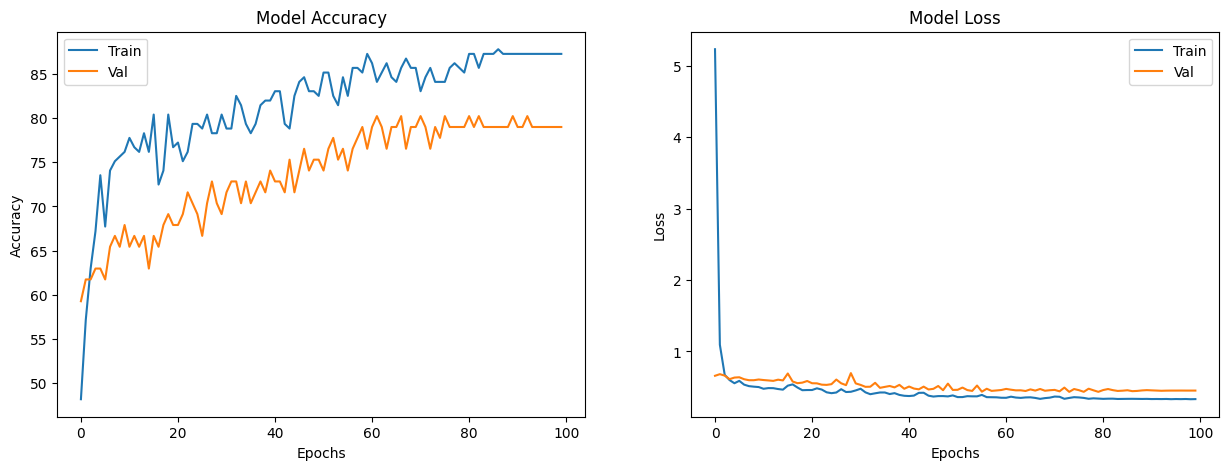

Training with hidden_units=64, learning_rate=0.001


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 2.7085, Train acc: 50.7937%, Val loss: 1.7750, Val acc: 54.3210%, Best Val loss: 1.7750 Best Val acc: 54.32%
Epoch 2/100, Train loss: 1.2634, Train acc: 45.5026%, Val loss: 0.7361, Val acc: 43.2099%, Best Val loss: 0.7361 Best Val acc: 54.32%
Epoch 3/100, Train loss: 0.7592, Train acc: 57.1429%, Val loss: 0.6298, Val acc: 61.7284%, Best Val loss: 0.6298 Best Val acc: 61.73%
Epoch 4/100, Train loss: 0.5942, Train acc: 69.3122%, Val loss: 0.6180, Val acc: 60.4938%, Best Val loss: 0.6180 Best Val acc: 61.73%
Epoch 5/100, Train loss: 0.6022, Train acc: 69.8413%, Val loss: 0.6988, Val acc: 61.7284%, Best Val loss: 0.6180 Best Val acc: 61.73%
Epoch 6/100, Train loss: 0.5590, Train acc: 72.4868%, Val loss: 0.6884, Val acc: 61.7284%, Best Val loss: 0.6180 Best Val acc: 61.73%
Epoch 7/100, Train loss: 0.5465, Train acc: 75.1323%, Val loss: 0.7356, Val acc: 59.2593%, Best Val loss: 0.6180 Best Val acc: 61.73%
Epoch 8/100, Train loss: 0.5564, Train acc: 71.9577%, Val loss

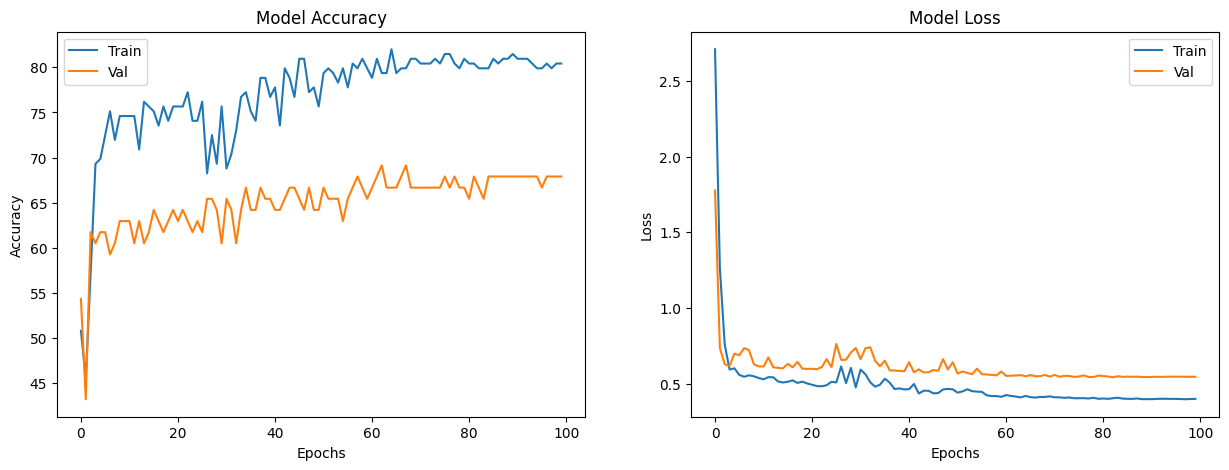

Training with hidden_units=64, learning_rate=0.0001


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 14.9693, Train acc: 45.5026%, Val loss: 13.2392, Val acc: 45.6790%, Best Val loss: 13.2392 Best Val acc: 45.68%
Epoch 2/100, Train loss: 12.9802, Train acc: 45.5026%, Val loss: 11.3157, Val acc: 45.6790%, Best Val loss: 11.3157 Best Val acc: 45.68%
Epoch 3/100, Train loss: 10.9926, Train acc: 45.5026%, Val loss: 9.4193, Val acc: 45.6790%, Best Val loss: 9.4193 Best Val acc: 45.68%
Epoch 4/100, Train loss: 9.0834, Train acc: 45.5026%, Val loss: 7.5577, Val acc: 45.6790%, Best Val loss: 7.5577 Best Val acc: 45.68%
Epoch 5/100, Train loss: 7.1743, Train acc: 45.5026%, Val loss: 5.7068, Val acc: 45.6790%, Best Val loss: 5.7068 Best Val acc: 45.68%
Epoch 6/100, Train loss: 5.2937, Train acc: 45.5026%, Val loss: 3.8183, Val acc: 45.6790%, Best Val loss: 3.8183 Best Val acc: 45.68%
Epoch 7/100, Train loss: 3.3169, Train acc: 45.5026%, Val loss: 2.0494, Val acc: 44.4444%, Best Val loss: 2.0494 Best Val acc: 45.68%
Epoch 8/100, Train loss: 1.7338, Train acc: 35.4497%, V

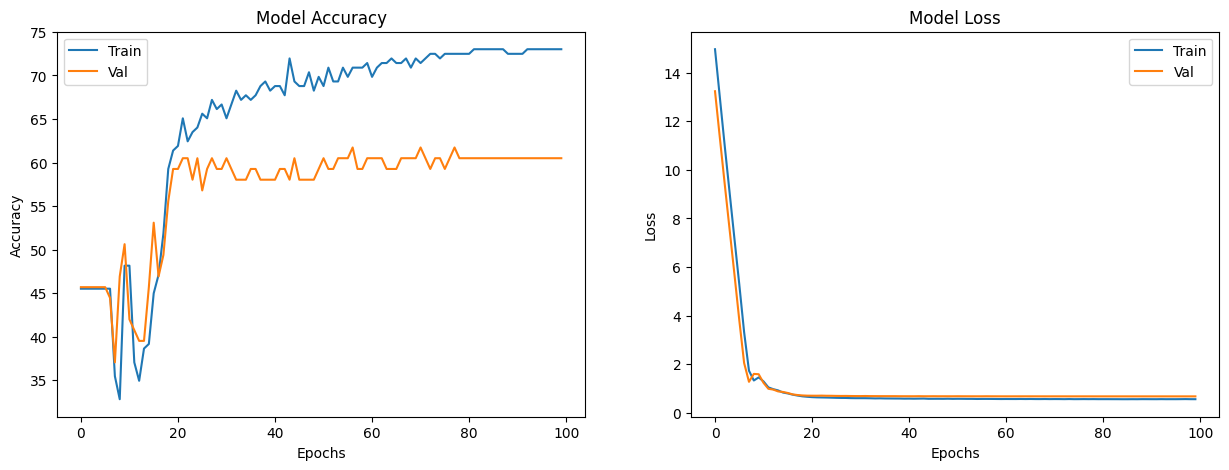

Training with hidden_units=128, learning_rate=0.01


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 19.6601, Train acc: 48.1481%, Val loss: 10.4623, Val acc: 54.3210%, Best Val loss: 10.4623 Best Val acc: 54.32%
Epoch 2/100, Train loss: 6.0557, Train acc: 42.3280%, Val loss: 0.8078, Val acc: 55.5556%, Best Val loss: 0.8078 Best Val acc: 55.56%
Epoch 3/100, Train loss: 2.1276, Train acc: 56.0847%, Val loss: 1.7570, Val acc: 54.3210%, Best Val loss: 0.8078 Best Val acc: 55.56%
Epoch 4/100, Train loss: 0.9345, Train acc: 59.7884%, Val loss: 1.2190, Val acc: 45.6790%, Best Val loss: 0.8078 Best Val acc: 55.56%
Epoch 5/100, Train loss: 0.9728, Train acc: 50.7937%, Val loss: 0.6476, Val acc: 59.2593%, Best Val loss: 0.6476 Best Val acc: 59.26%
Epoch 6/100, Train loss: 0.6402, Train acc: 59.7884%, Val loss: 0.6776, Val acc: 58.0247%, Best Val loss: 0.6476 Best Val acc: 59.26%
Epoch 7/100, Train loss: 0.5823, Train acc: 72.4868%, Val loss: 0.6592, Val acc: 62.9630%, Best Val loss: 0.6476 Best Val acc: 62.96%
Epoch 8/100, Train loss: 0.5444, Train acc: 75.1323%, Val l

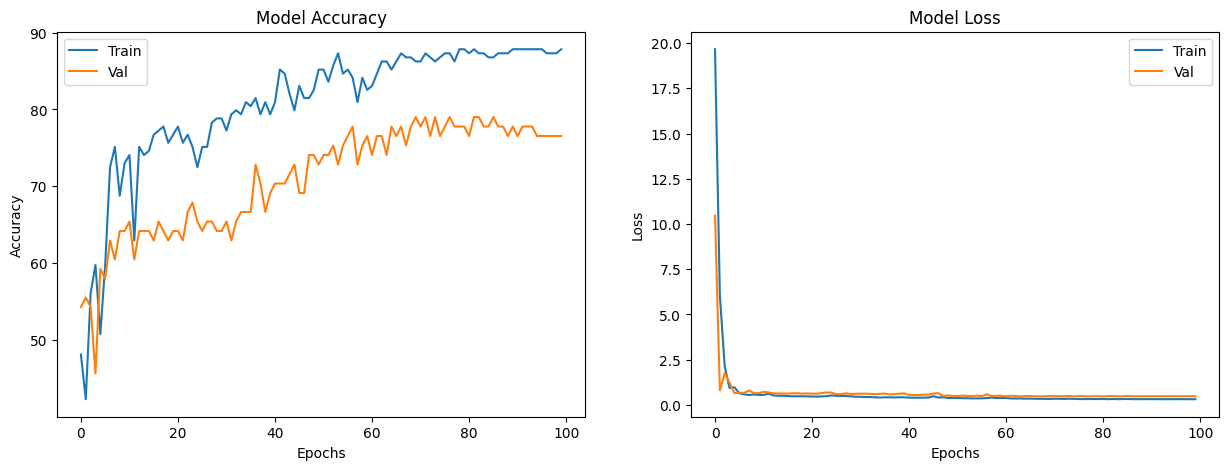

Training with hidden_units=128, learning_rate=0.001


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 3.6207, Train acc: 53.9683%, Val loss: 0.9114, Val acc: 54.3210%, Best Val loss: 0.9114 Best Val acc: 54.32%
Epoch 2/100, Train loss: 0.8849, Train acc: 59.7884%, Val loss: 0.9583, Val acc: 61.7284%, Best Val loss: 0.9114 Best Val acc: 61.73%
Epoch 3/100, Train loss: 0.6672, Train acc: 67.1958%, Val loss: 0.7183, Val acc: 64.1975%, Best Val loss: 0.7183 Best Val acc: 64.20%
Epoch 4/100, Train loss: 0.5949, Train acc: 65.6085%, Val loss: 0.7051, Val acc: 59.2593%, Best Val loss: 0.7051 Best Val acc: 64.20%
Epoch 5/100, Train loss: 0.5481, Train acc: 75.1323%, Val loss: 0.7308, Val acc: 60.4938%, Best Val loss: 0.7051 Best Val acc: 64.20%
Epoch 6/100, Train loss: 0.5655, Train acc: 68.2540%, Val loss: 0.7263, Val acc: 61.7284%, Best Val loss: 0.7051 Best Val acc: 64.20%
Epoch 7/100, Train loss: 0.6131, Train acc: 68.7831%, Val loss: 0.6872, Val acc: 62.9630%, Best Val loss: 0.6872 Best Val acc: 64.20%
Epoch 8/100, Train loss: 0.5305, Train acc: 71.4286%, Val loss

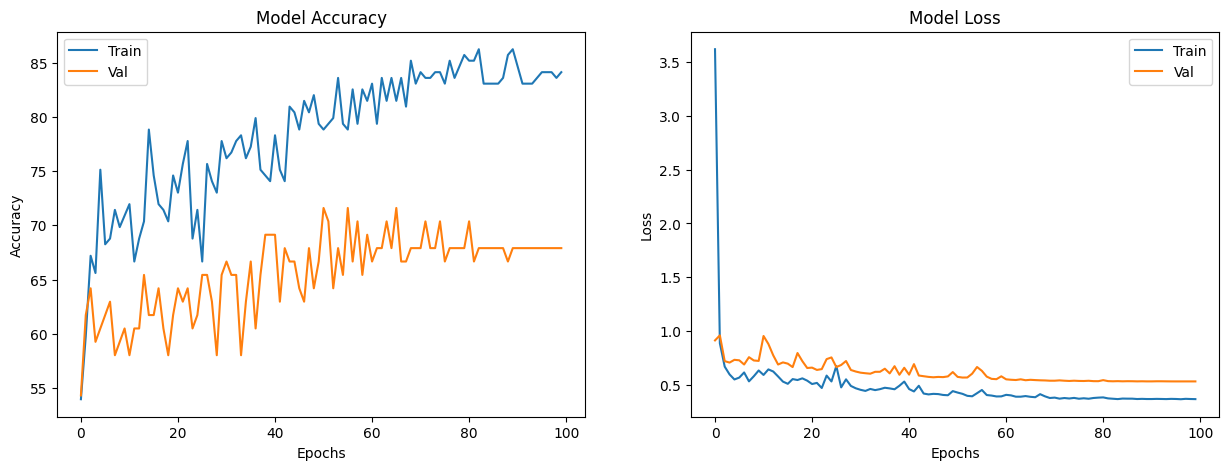

Training with hidden_units=128, learning_rate=0.0001


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 0.8347, Train acc: 52.9101%, Val loss: 0.7972, Val acc: 53.0864%, Best Val loss: 0.7972 Best Val acc: 53.09%
Epoch 2/100, Train loss: 0.7050, Train acc: 54.4974%, Val loss: 0.7387, Val acc: 55.5556%, Best Val loss: 0.7387 Best Val acc: 55.56%
Epoch 3/100, Train loss: 0.6045, Train acc: 66.1376%, Val loss: 0.6698, Val acc: 64.1975%, Best Val loss: 0.6698 Best Val acc: 64.20%
Epoch 4/100, Train loss: 0.5702, Train acc: 70.8995%, Val loss: 0.6678, Val acc: 60.4938%, Best Val loss: 0.6678 Best Val acc: 64.20%
Epoch 5/100, Train loss: 0.5682, Train acc: 71.9577%, Val loss: 0.6630, Val acc: 61.7284%, Best Val loss: 0.6630 Best Val acc: 64.20%
Epoch 6/100, Train loss: 0.5498, Train acc: 75.1323%, Val loss: 0.6638, Val acc: 60.4938%, Best Val loss: 0.6630 Best Val acc: 64.20%
Epoch 7/100, Train loss: 0.5460, Train acc: 75.6614%, Val loss: 0.6626, Val acc: 61.7284%, Best Val loss: 0.6626 Best Val acc: 64.20%
Epoch 8/100, Train loss: 0.5508, Train acc: 75.6614%, Val loss

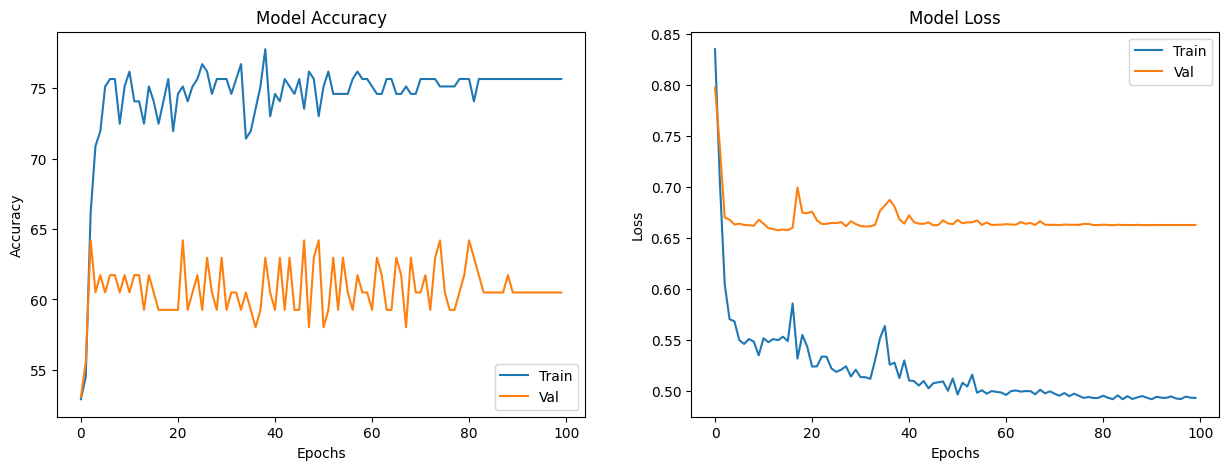

Training with hidden_units=256, learning_rate=0.01


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 47.8542, Train acc: 47.6190%, Val loss: 15.4062, Val acc: 45.6790%, Best Val loss: 15.4062 Best Val acc: 45.68%
Epoch 2/100, Train loss: 5.2341, Train acc: 52.9101%, Val loss: 3.2837, Val acc: 45.6790%, Best Val loss: 3.2837 Best Val acc: 45.68%
Epoch 3/100, Train loss: 1.3576, Train acc: 50.7937%, Val loss: 0.9734, Val acc: 45.6790%, Best Val loss: 0.9734 Best Val acc: 45.68%
Epoch 4/100, Train loss: 0.6678, Train acc: 61.3757%, Val loss: 0.6259, Val acc: 61.7284%, Best Val loss: 0.6259 Best Val acc: 61.73%
Epoch 5/100, Train loss: 0.5946, Train acc: 68.7831%, Val loss: 0.6376, Val acc: 61.7284%, Best Val loss: 0.6259 Best Val acc: 61.73%
Epoch 6/100, Train loss: 0.6658, Train acc: 62.9630%, Val loss: 0.6330, Val acc: 60.4938%, Best Val loss: 0.6259 Best Val acc: 61.73%
Epoch 7/100, Train loss: 0.5751, Train acc: 70.8995%, Val loss: 0.6266, Val acc: 61.7284%, Best Val loss: 0.6259 Best Val acc: 61.73%
Epoch 8/100, Train loss: 0.5337, Train acc: 74.6032%, Val l

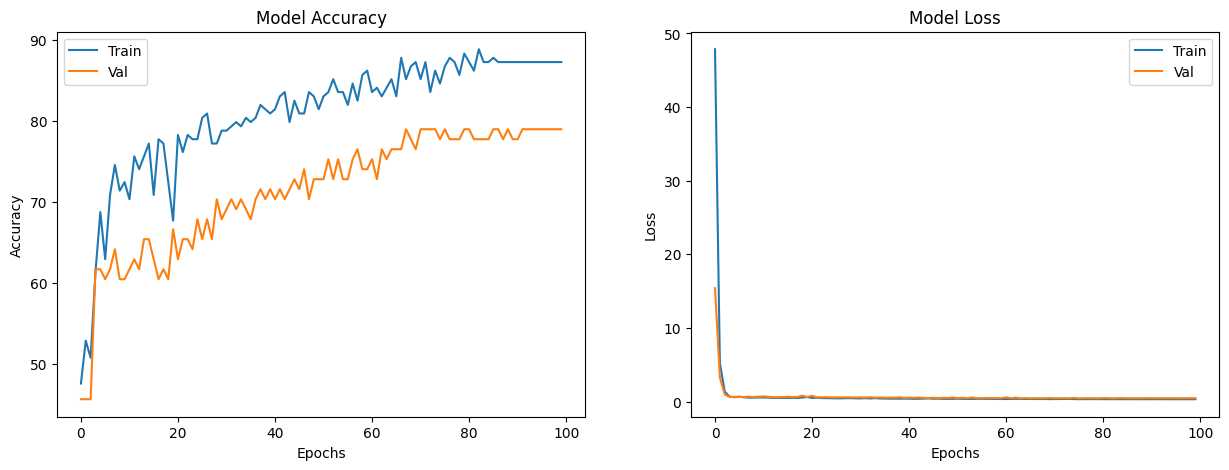

Training with hidden_units=256, learning_rate=0.001


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 7.8779, Train acc: 50.7937%, Val loss: 1.8199, Val acc: 45.6790%, Best Val loss: 1.8199 Best Val acc: 45.68%
Epoch 2/100, Train loss: 1.8601, Train acc: 59.7884%, Val loss: 2.4791, Val acc: 51.8519%, Best Val loss: 1.8199 Best Val acc: 51.85%
Epoch 3/100, Train loss: 0.9731, Train acc: 70.8995%, Val loss: 1.0582, Val acc: 59.2593%, Best Val loss: 1.0582 Best Val acc: 59.26%
Epoch 4/100, Train loss: 0.7761, Train acc: 71.9577%, Val loss: 1.3787, Val acc: 62.9630%, Best Val loss: 1.0582 Best Val acc: 62.96%
Epoch 5/100, Train loss: 0.9385, Train acc: 67.7249%, Val loss: 0.9360, Val acc: 61.7284%, Best Val loss: 0.9360 Best Val acc: 62.96%
Epoch 6/100, Train loss: 0.6686, Train acc: 69.3122%, Val loss: 0.8103, Val acc: 62.9630%, Best Val loss: 0.8103 Best Val acc: 62.96%
Epoch 7/100, Train loss: 0.6396, Train acc: 71.9577%, Val loss: 0.7560, Val acc: 62.9630%, Best Val loss: 0.7560 Best Val acc: 62.96%
Epoch 8/100, Train loss: 0.6147, Train acc: 71.9577%, Val loss

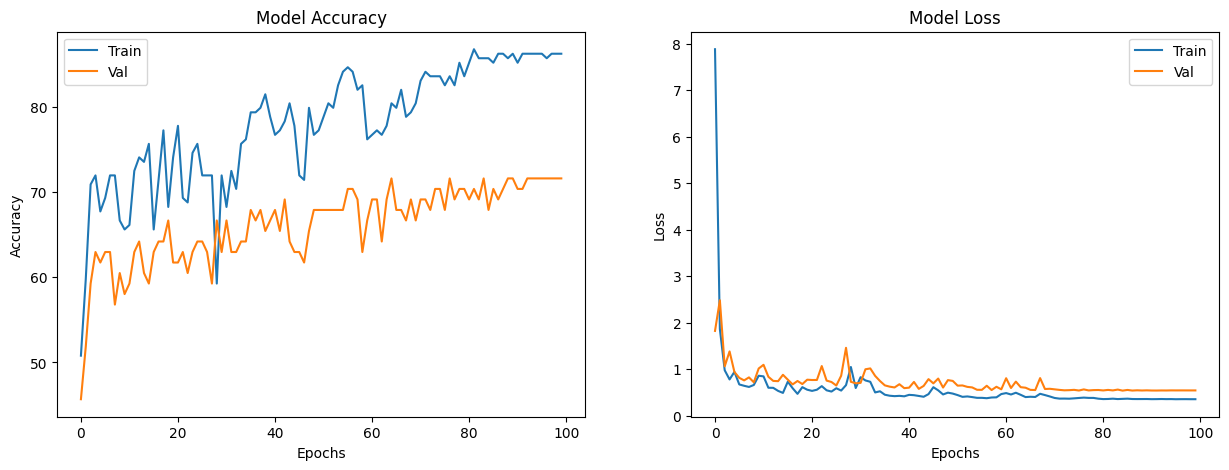

Training with hidden_units=256, learning_rate=0.0001


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 2.5344, Train acc: 42.8571%, Val loss: 3.0762, Val acc: 53.0864%, Best Val loss: 3.0762 Best Val acc: 53.09%
Epoch 2/100, Train loss: 1.8309, Train acc: 51.8519%, Val loss: 1.3002, Val acc: 40.7407%, Best Val loss: 1.3002 Best Val acc: 53.09%
Epoch 3/100, Train loss: 1.2301, Train acc: 45.5026%, Val loss: 0.9158, Val acc: 49.3827%, Best Val loss: 0.9158 Best Val acc: 53.09%
Epoch 4/100, Train loss: 0.8844, Train acc: 56.6138%, Val loss: 0.8233, Val acc: 51.8519%, Best Val loss: 0.8233 Best Val acc: 53.09%
Epoch 5/100, Train loss: 0.7070, Train acc: 58.7302%, Val loss: 0.7430, Val acc: 61.7284%, Best Val loss: 0.7430 Best Val acc: 61.73%
Epoch 6/100, Train loss: 0.5723, Train acc: 70.8995%, Val loss: 0.7489, Val acc: 58.0247%, Best Val loss: 0.7430 Best Val acc: 61.73%
Epoch 7/100, Train loss: 0.6028, Train acc: 67.1958%, Val loss: 0.7028, Val acc: 60.4938%, Best Val loss: 0.7028 Best Val acc: 61.73%
Epoch 8/100, Train loss: 0.5592, Train acc: 71.4286%, Val loss

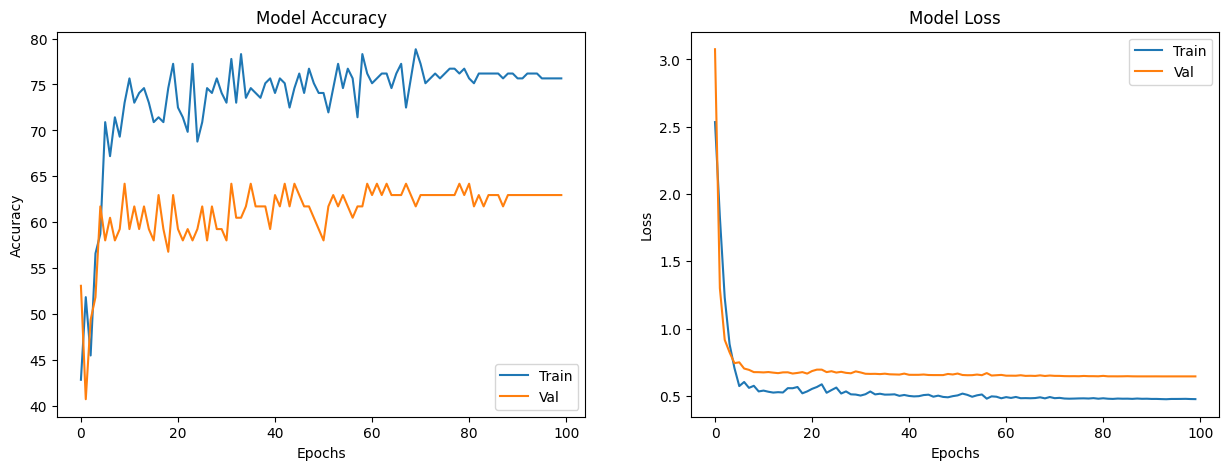

In [42]:
for hidden_units in hidden_unit_options:
  for learning_rate in learning_rate_options:
    print(f"Training with hidden_units={hidden_units}, learning_rate={learning_rate}")

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    epochs = 100

    model = Model(hidden_units=hidden_units)
    # print(model)

    best_val_loss = float('inf')
    best_val_acc = -1

    criterion = nn.CrossEntropyLoss()  #適用於分類問題
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)  #學習率最低降到0

    for epoch in tqdm(range(epochs)):
        # Training
        model.train()  #設定模型為「訓練模式」
        total_loss = 0.0
        train_correct = 0
        total_train_samples = 0

        for features, labels in train_loader:
            features = features.cuda()
            labels = labels.cuda()

            outputs = model(features)

            loss = criterion(outputs, labels)
            total_loss += loss.item()

            optimizer.zero_grad()  #清空前一次的梯度
            loss.backward()  #計算目前 loss 的梯度
            optimizer.step()  #根據梯度更新參數

            train_predicted = outputs.argmax(-1)  #找出預測機率最高的類別
            train_correct += (train_predicted == labels).sum().item()
            total_train_samples += labels.size(0)

        # Learning rate update
        lr_scheduler.step()  #每個 epoch 結束後，根據餘弦退火計算新學習率

        avg_train_loss = total_loss / len(train_loader)  #平均損失 = 所有 batch 損失總和 / batch 數
        train_accuracy = 100. * train_correct / total_train_samples  #準確率 = 正確數量 / 全部訓練資料數量

        # Validation
        model.eval()  #評估模式會關閉像是Dropout或BatchNorm的訓練特性
        total_val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():  #停用梯度運算
            for features, labels in val_loader:  #驗證資料迴圈
                features = features.cuda()
                labels = labels.cuda()

                outputs = model(features)

                loss = criterion(outputs, labels)
                total_val_loss += loss.item()

                predicted = outputs.argmax(-1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)  #計算總驗證樣本數

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = 100. * correct / total

        # Checkpoint
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss

        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            torch.save(model.state_dict(), 'model_classification.pth')

        print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

        # Store performance
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

    model.load_state_dict(torch.load('model_classification.pth'))
    test_loss, test_accuracy = evaluate_on_test(model, test_loader, criterion)
    results.append({
        "hidden_units": hidden_units,
        "learning_rate": learning_rate,
        "train_loss": train_losses[-1],
        "val_loss": val_losses[-1],
        "test_loss": test_loss,
        "train_acc": train_accuracies[-1],
        "val_acc": val_accuracies[-1],
        "test_acc": test_accuracy
    })
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Plotting training and validation accuracy
    ax[0].plot(train_accuracies)
    ax[0].plot(val_accuracies)
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(['Train', 'Val'])

    # Plotting training and validation loss
    ax[1].plot(train_losses)
    ax[1].plot(val_losses)
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend(['Train', 'Val'])

    plt.show()


#### Visualizing the model performance

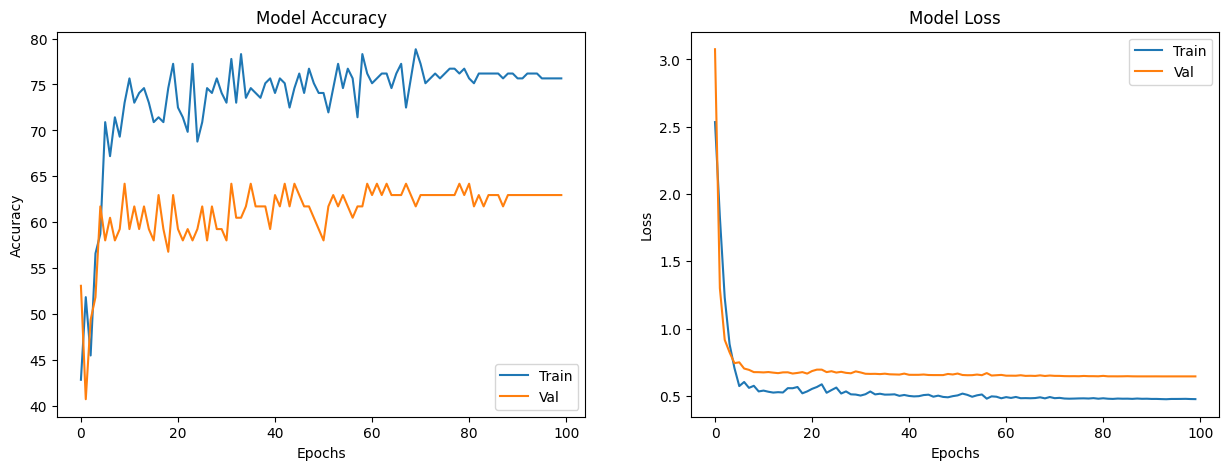

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

In [44]:
# Question 1
df_results = pd.DataFrame(results)
#df_results = df_results.round(2)
df_results.to_csv("hyperparameter_results.csv", index=False)
df_results

,hidden_units,learning_rate,train_loss,val_loss,test_loss,train_acc,val_acc,test_acc
0,64,0.0100,0.333040,0.452469,0.530986,87.301587,79.012346,77.419355
1,64,0.0010,0.400696,0.546622,0.594105,80.423280,67.901235,67.741935
2,64,0.0001,0.559685,0.676076,0.700562,73.015873,60.493827,67.741935
3,128,0.0100,0.312725,0.479431,0.513771,87.830688,76.543210,77.419355
4,128,0.0010,0.365069,0.529939,0.673783,84.126984,67.901235,70.967742
5,128,0.0001,0.493081,0.662497,0.705699,75.661376,60.493827,58.064516
6,256,0.0100,0.324176,0.462043,0.500081,87.301587,79.012346,74.193548
7,256,0.0010,0.351008,0.539792,0.613114,86.243386,71.604938,80.645161
8,256,0.0001,0.475393,0.644377,0.713445,75.661376,62.962963,61.290323


In [45]:
df_results

,hidden_units,learning_rate,train_loss,val_loss,test_loss,train_acc,val_acc,test_acc
0,64,0.0100,0.333040,0.452469,0.530986,87.301587,79.012346,77.419355
1,64,0.0010,0.400696,0.546622,0.594105,80.423280,67.901235,67.741935
2,64,0.0001,0.559685,0.676076,0.700562,73.015873,60.493827,67.741935
3,128,0.0100,0.312725,0.479431,0.513771,87.830688,76.543210,77.419355
4,128,0.0010,0.365069,0.529939,0.673783,84.126984,67.901235,70.967742
5,128,0.0001,0.493081,0.662497,0.705699,75.661376,60.493827,58.064516
6,256,0.0100,0.324176,0.462043,0.500081,87.301587,79.012346,74.193548
7,256,0.0010,0.351008,0.539792,0.613114,86.243386,71.604938,80.645161
8,256,0.0001,0.475393,0.644377,0.713445,75.661376,62.962963,61.290323


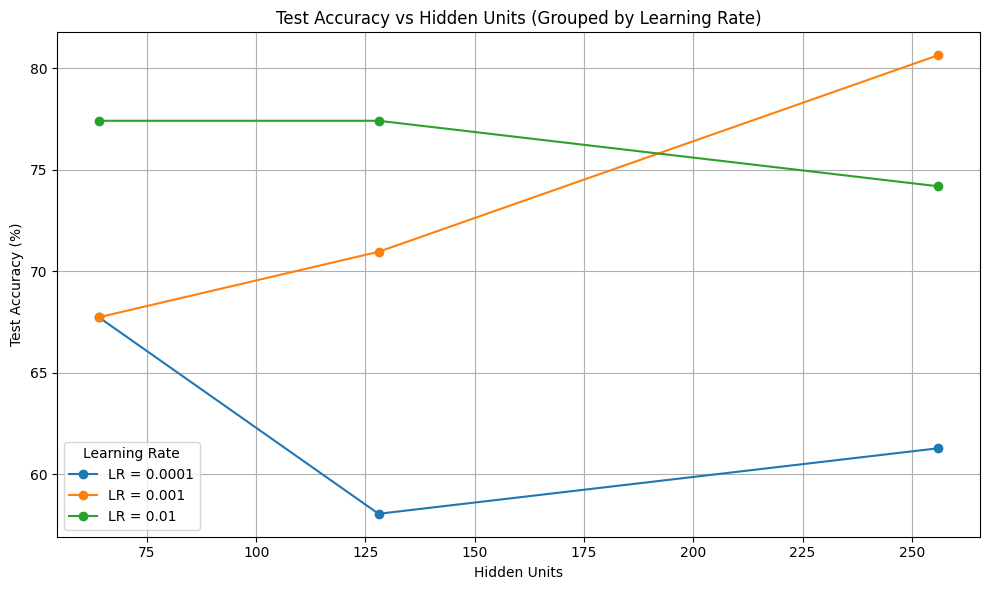

In [46]:
# Question 2
plt.figure(figsize=(10, 6))

for lr in sorted(df_results['learning_rate'].unique()):
    subset = df_results[df_results['learning_rate'] == lr]
    plt.plot(subset['hidden_units'], subset['test_acc'], marker='o', label=f"LR = {lr}")

plt.title("Test Accuracy vs Hidden Units (Grouped by Learning Rate)")
plt.xlabel("Hidden Units")
plt.ylabel("Test Accuracy (%)")
plt.legend(title="Learning Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

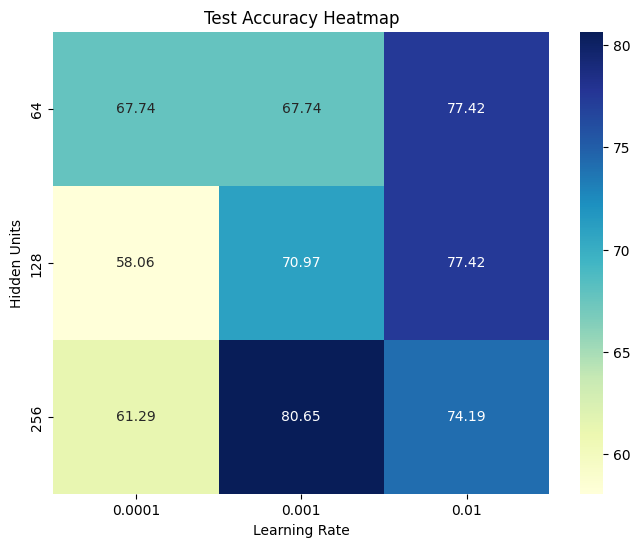

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = df_results.pivot(index='hidden_units', columns='learning_rate', values='test_acc')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Test Accuracy Heatmap")
plt.xlabel("Learning Rate")
plt.ylabel("Hidden Units")
plt.show()